In [2]:
# Imports
from datetime import datetime
import numpy as np             
import pandas as pd           
import matplotlib.pylab as plt         
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
# Load Data
series = pd.read_csv('C:\\Users\\RenanSardinha\\Documents\\Data Science\\Covid-19_RJ_Brasil\\Data\\db_PainelRioCovid.csv')
print(series)

       classificação_final  dt_notific dt_inicio_sintomas  \
0               CONFIRMADO   9/18/2020           9/3/2020   
1               CONFIRMADO  11/25/2020          11/2/2020   
2               CONFIRMADO    5/6/2020           5/6/2020   
3               CONFIRMADO  11/12/2020          11/2/2020   
4               CONFIRMADO   6/13/2020          4/26/2020   
...                    ...         ...                ...   
220542          CONFIRMADO   3/23/2021          3/13/2021   
220543          CONFIRMADO   3/23/2021           3/7/2021   
220544          CONFIRMADO   3/23/2021          3/22/2021   
220545          CONFIRMADO   3/23/2021          3/10/2021   
220546          CONFIRMADO   3/23/2021          3/22/2021   

       bairro_resid_estadia ap_residencia_estadia sexo faixa_etaria  \
0                 PACIENCIA                   5.3    M   De 50 a 59   
1           BARRA DA TIJUCA                     4    M   De 80 a 89   
2                  CACHAMBI                   3.2    M

In [4]:
# Preprocessing
series['dt_notific'] = pd.to_datetime(series['dt_notific'])
print(series)

df = series.groupby('dt_notific').dt_notific.count()
df = pd.DataFrame(df)
df.index = pd.to_datetime(df.index)
df.index.names = ['Date']
df.rename(columns={'dt_notific': 'Cases'}, inplace = True)
print(df)

print(df.iloc[[0,-1]])

ts = df['Cases']
print(ts.head(10))

       classificação_final dt_notific dt_inicio_sintomas bairro_resid_estadia  \
0               CONFIRMADO 2020-09-18           9/3/2020            PACIENCIA   
1               CONFIRMADO 2020-11-25          11/2/2020      BARRA DA TIJUCA   
2               CONFIRMADO 2020-05-06           5/6/2020             CACHAMBI   
3               CONFIRMADO 2020-11-12          11/2/2020      BARRA DA TIJUCA   
4               CONFIRMADO 2020-06-13          4/26/2020      MARECHAL HERMES   
...                    ...        ...                ...                  ...   
220542          CONFIRMADO 2021-03-23          3/13/2021             FLAMENGO   
220543          CONFIRMADO 2021-03-23           3/7/2021         BRAS DE PINA   
220544          CONFIRMADO 2021-03-23          3/22/2021               OLARIA   
220545          CONFIRMADO 2021-03-23          3/10/2021     MAGALHAES BASTOS   
220546          CONFIRMADO 2021-03-23          3/22/2021      BARRA DA TIJUCA   

       ap_residencia_estadi

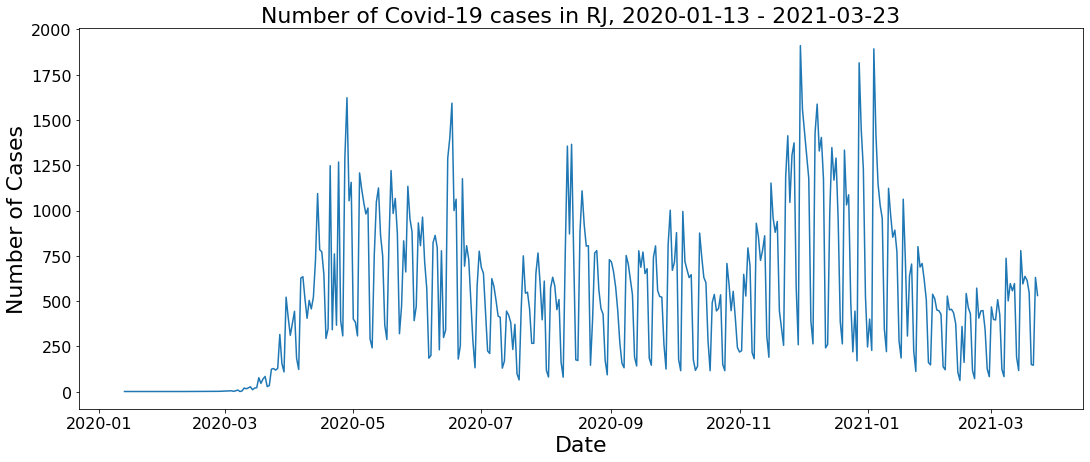

In [5]:
# Cases Plot
plt.figure(figsize=(18,7))
plt.plot(ts)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of Cases', fontsize=22)
plt.title('Number of Covid-19 cases in RJ, 2020-01-13 - 2021-03-23', fontsize=22)
plt.show()

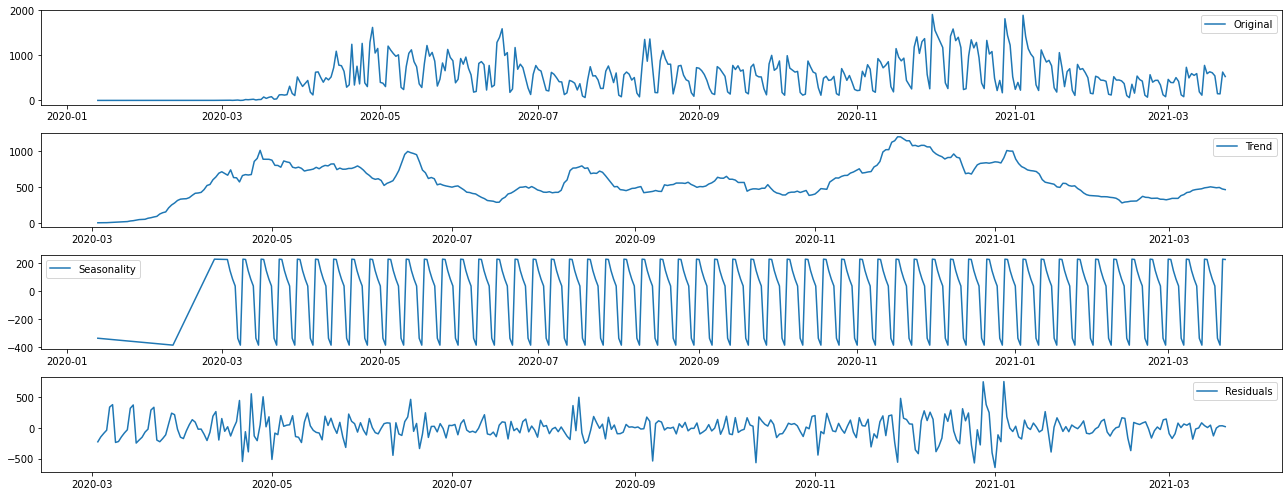

In [6]:
# Seasonal Decompose
decomposition = seasonal_decompose(ts, period=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,7))
plt.subplot(411)
plt.plot(ts,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


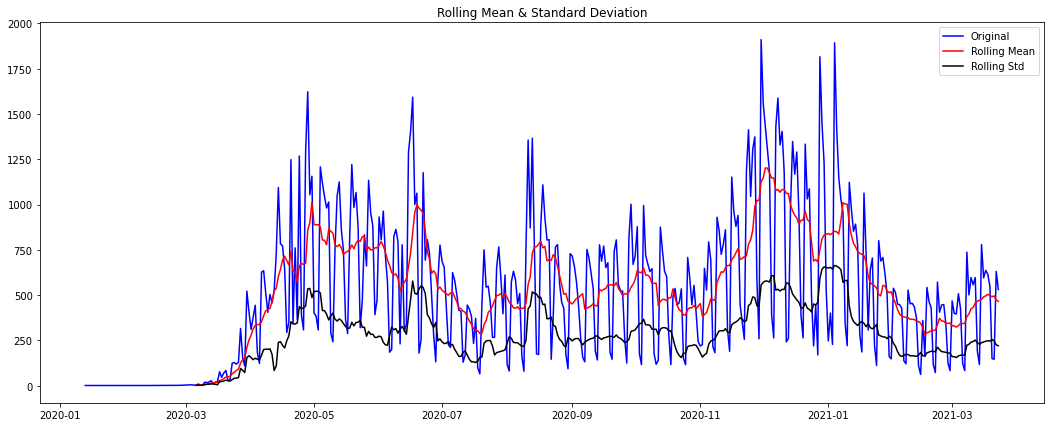

Results of Dickey-Fuller Test:
Test Statistic                  -2.895020
p-value                          0.045930
#Lags Used                      17.000000
Number of Observations Used    371.000000
Critical Value (1%)             -3.448100
Critical Value (5%)             -2.869362
Critical Value (10%)            -2.570937
dtype: float64


In [212]:
# Stationarity
def test_stationarity(timeseries):
    
    # Rolling Statistics
    rolmean = pd.Series(timeseries).rolling(window=7).mean()
    rolstd = pd.Series(timeseries).rolling(window=7).std()
    
    # Plot Rolling Statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

plt.figure(figsize=(18,7))
test_stationarity(ts)
plt.show()


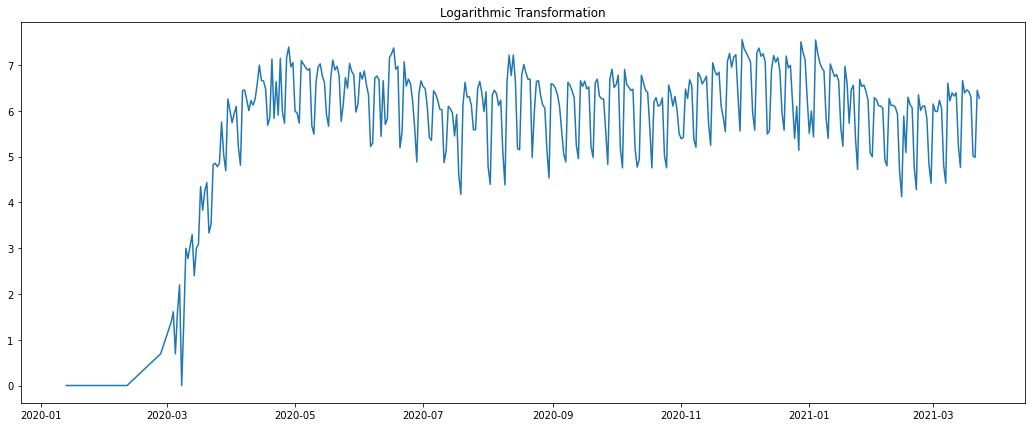

In [8]:
# Make series stationary
plt.figure(figsize=(18,7))
ts_log = np.log(ts)
plt.plot(ts_log)
plt.title('Logarithmic Transformation')
plt.show()




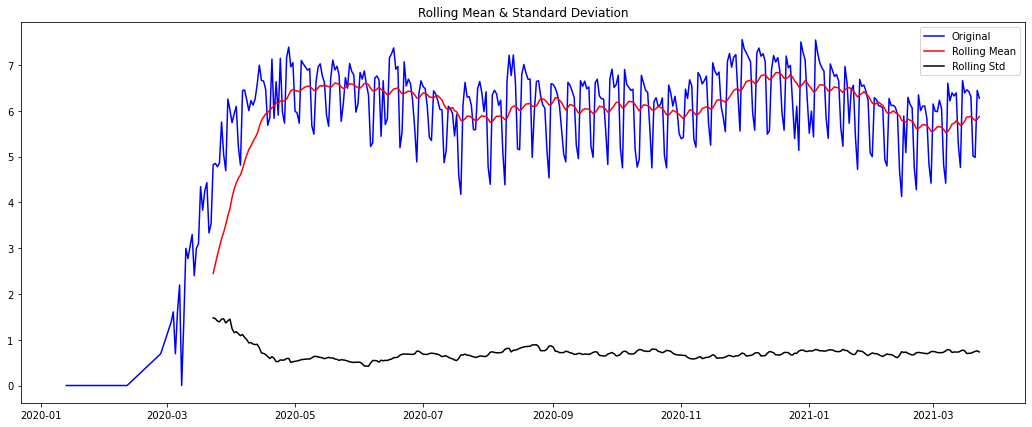

Results of Dickey-Fuller Test:
Test Statistic                  -4.694037
p-value                          0.000086
#Lags Used                      16.000000
Number of Observations Used    372.000000
Critical Value (1%)             -3.448052
Critical Value (5%)             -2.869341
Critical Value (10%)            -2.570926
dtype: float64


In [9]:
plt.figure(figsize=(18,7))
ts_log.dropna(inplace=True)
test_stationarity(ts_log)
plt.show()

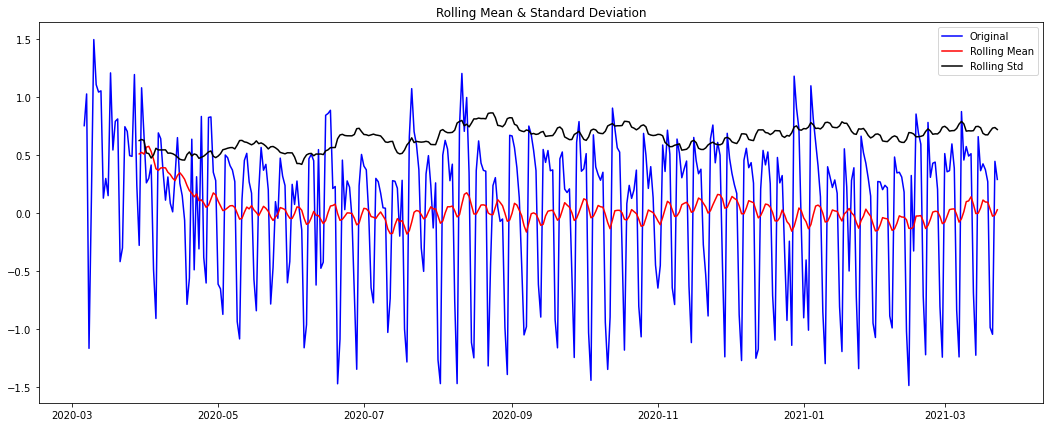

Results of Dickey-Fuller Test:
Test Statistic                  -4.661451
p-value                          0.000099
#Lags Used                      17.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.448394
Critical Value (5%)             -2.869491
Critical Value (10%)            -2.571006
dtype: float64


In [10]:
rolling_mean = ts_log.rolling(window=7).mean()
ts_log_minus_mean = ts_log - rolling_mean


plt.figure(figsize=(18,7))
ts_log_minus_mean.dropna(inplace=True)
test_stationarity(ts_log_minus_mean)
plt.show()


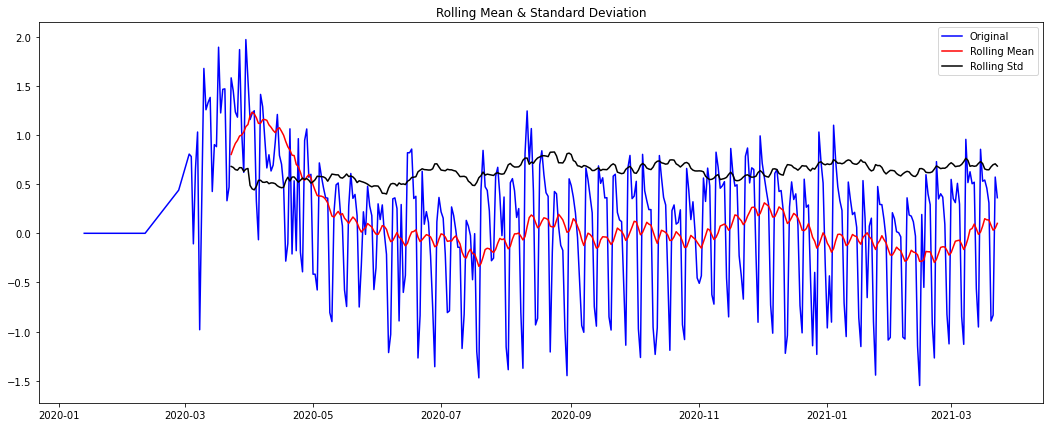

Results of Dickey-Fuller Test:
Test Statistic                  -2.333482
p-value                          0.161397
#Lags Used                      14.000000
Number of Observations Used    374.000000
Critical Value (1%)             -3.447956
Critical Value (5%)             -2.869299
Critical Value (10%)            -2.570903
dtype: float64


In [11]:
rolling_mean_exp_decay = ts_log.ewm(halflife=7, min_periods=0, adjust=True).mean()
rolling_mean_exp_decay = ts_log - rolling_mean_exp_decay

plt.figure(figsize=(18,7))
test_stationarity(rolling_mean_exp_decay)

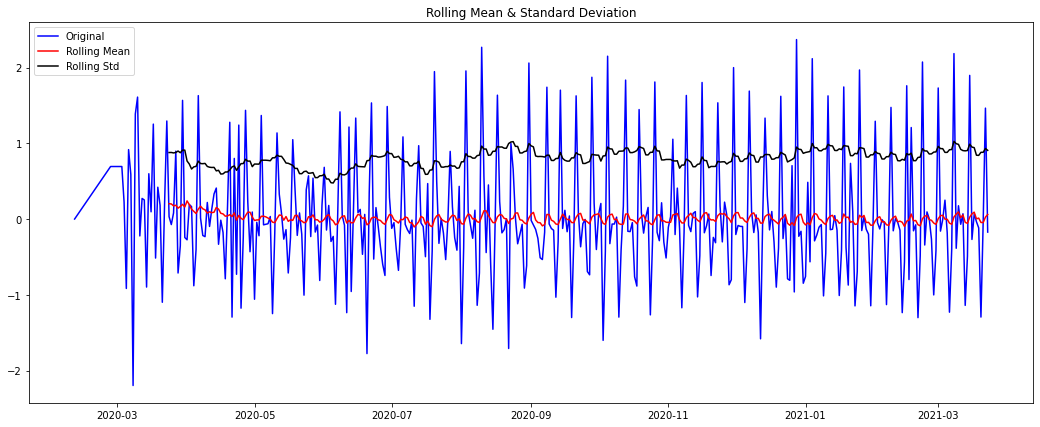

Results of Dickey-Fuller Test:
Test Statistic                  -4.412541
p-value                          0.000282
#Lags Used                      17.000000
Number of Observations Used    370.000000
Critical Value (1%)             -3.448148
Critical Value (5%)             -2.869383
Critical Value (10%)            -2.570948
dtype: float64


In [12]:
ts_log_shift = ts_log - ts_log.shift()
ts_log_shift.dropna(inplace=True)

plt.figure(figsize=(18,7))
test_stationarity(ts_log_shift)

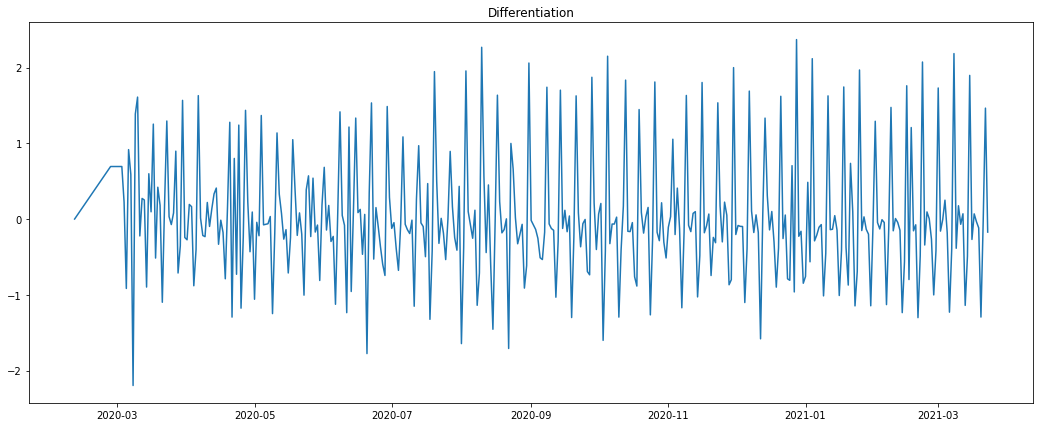

In [13]:
plt.figure(figsize=(18,7))
ts_log_diff = ts_log.diff()
plt.plot(ts_log_diff)
plt.title('Differentiation')
plt.show()

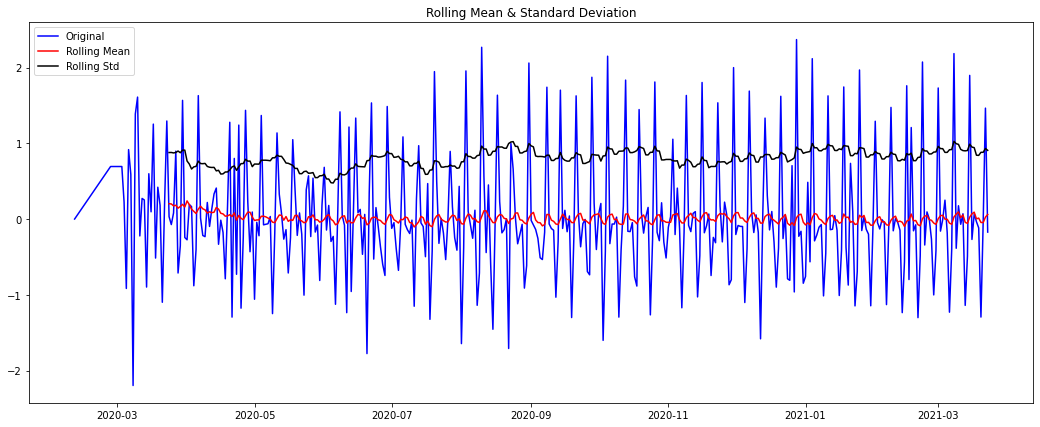

Results of Dickey-Fuller Test:
Test Statistic                  -4.412541
p-value                          0.000282
#Lags Used                      17.000000
Number of Observations Used    370.000000
Critical Value (1%)             -3.448148
Critical Value (5%)             -2.869383
Critical Value (10%)            -2.570948
dtype: float64


In [14]:
plt.figure(figsize=(18,7))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)
plt.show()

Text(0.5, 1.0, 'ACF Differentiated Data')

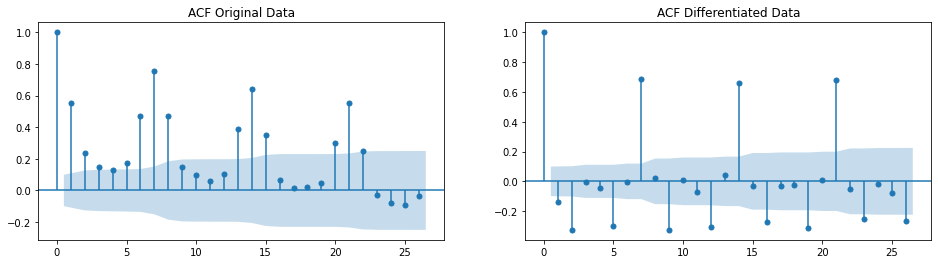

In [231]:
# ACF | PACF
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

plot_acf(ts, ax=ax1)
ax1.set_title("ACF Original Data")
plot_acf(ts_log_shift, ax=ax2)
ax2.set_title("ACF Differentiated Data")

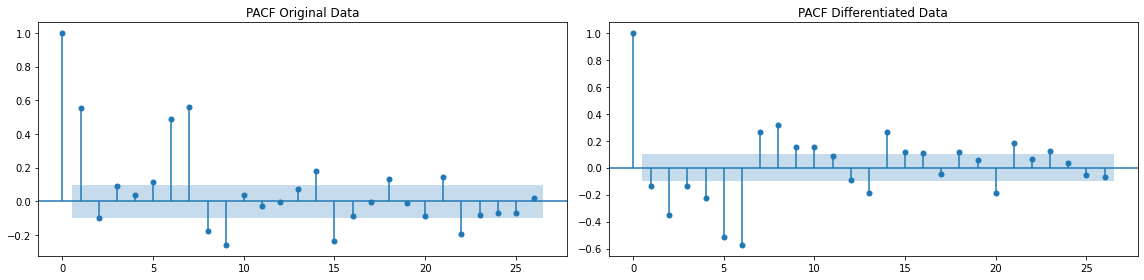

In [232]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

plot_pacf(ts, ax=ax1)
ax1.set_title("PACF Original Data")
plot_pacf(ts_log_shift, ax=ax2)
ax2.set_title("PACF Differentiated Data")
plt.tight_layout()
plt.show()

In [44]:
ts_log_pd = pd.DataFrame(ts_log)

In [47]:
X = ts_log_pd
#X = X.astype('float32')

train = X.iloc[0:272]
test = X.iloc[-117:]

In [98]:
ts_pd = pd.DataFrame(ts)
Z = ts_pd
# Z = Z.astype('float32')

train_ts = Z.iloc[0:272]
test_ts = Z.iloc[-117:]

In [45]:
ts_shift_pd = pd.DataFrame(ts_log_shift)

In [49]:
s = ts_shift_pd
#s = s.astype('float32')

train_shift = s.iloc[0:272]
test_shift = s.iloc[-117:]

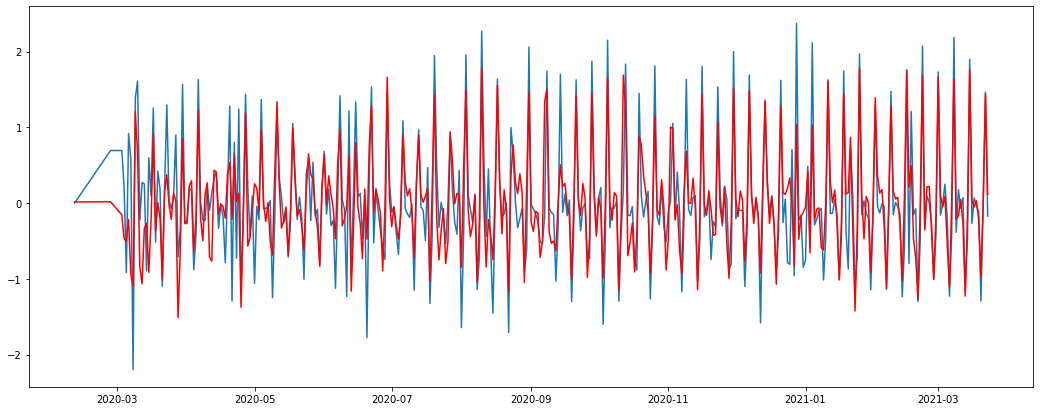

In [68]:
model = ARIMA(ts_log_pd, order=(10,1,2))
results = model.fit(disp=-1)
plt.figure(figsize=(18,7))
plt.plot(ts_shift_pd)
plt.plot(results.fittedvalues, color='red')


In [69]:
results.aic

488.6187188203528

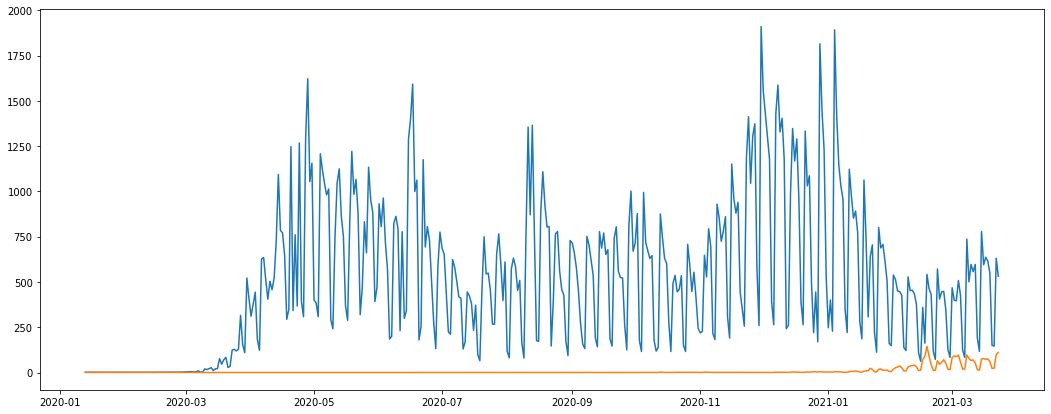

In [70]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log_pd['Cases'].iloc[0], index=ts_log_pd.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(18,7))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.show()

Text(0.5, 1.0, 'RMSE: nan')

<Figure size 1296x504 with 0 Axes>

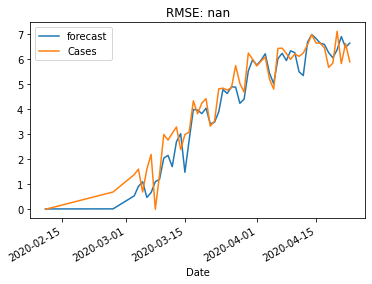

In [210]:
results.plot_predict(1,54) 
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

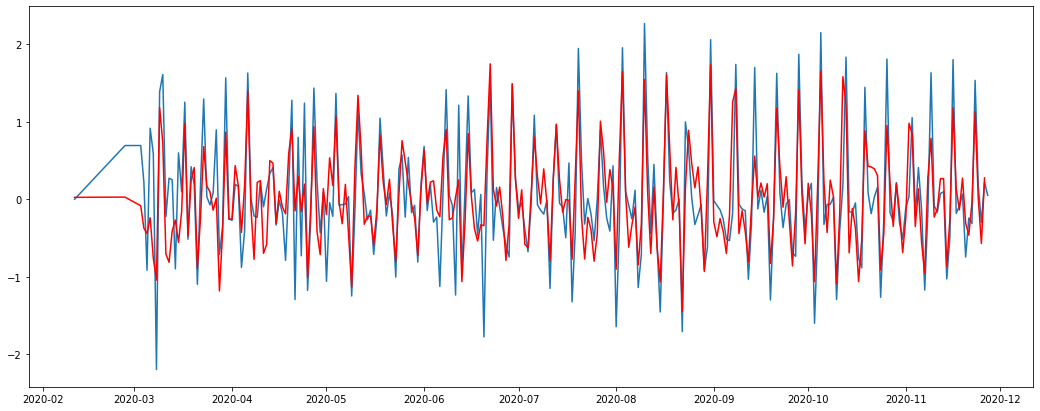

In [73]:
model1 = ARIMA(train, order=(10,1,2))
results1 = model1.fit(disp=-1)
plt.figure(figsize=(18,7))
plt.plot(train_shift)
plt.plot(results1.fittedvalues, color='red')

In [74]:
results1.aic

370.8948790293879

In [132]:
pred_test = predictions_ARIMA.iloc[-117:]

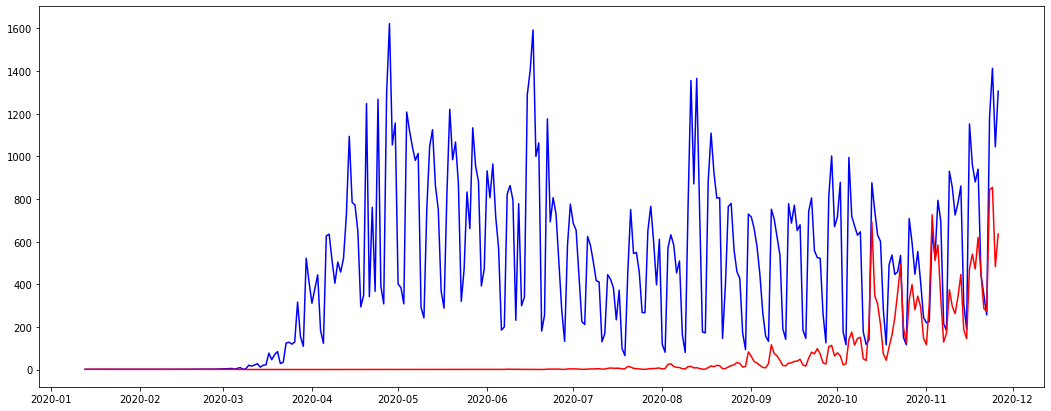

In [150]:
predictions_ARIMA_diff = pd.Series(results1.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(train['Cases'].iloc[0], index=train.index)
predictions_ARIMA_log = (predictions_ARIMA_log).add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(18,7))
plt.plot(train_ts, color='blue')
plt.plot(predictions_ARIMA, color='red')
plt.show()

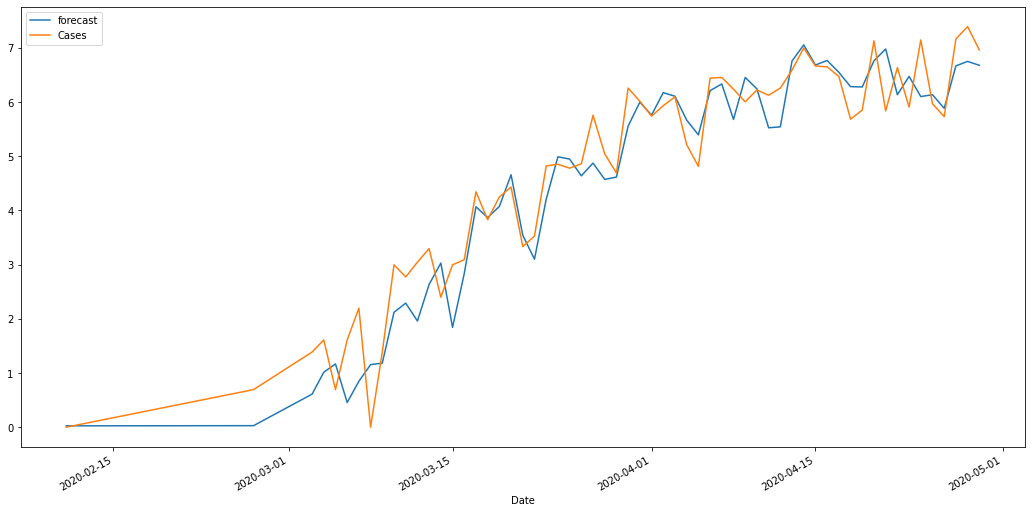

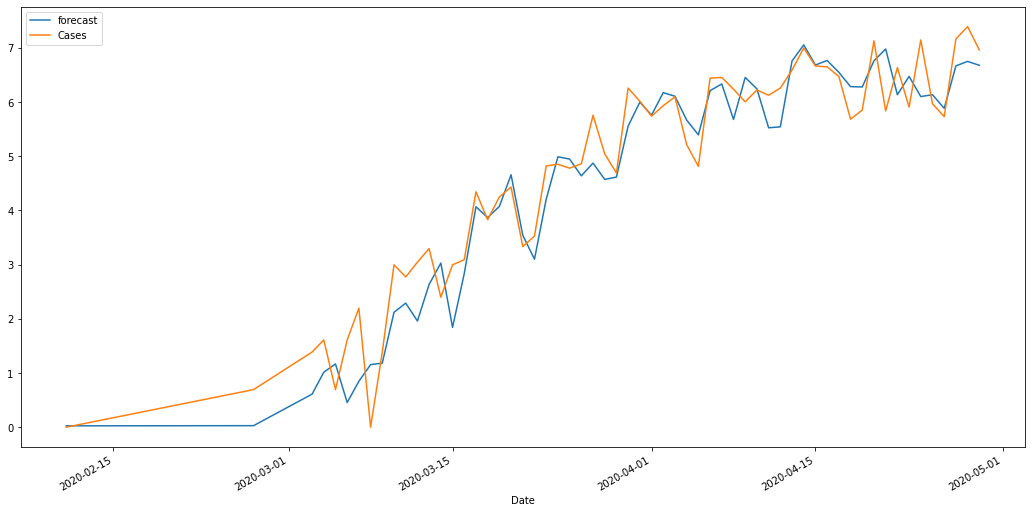

In [160]:
fig, ax = plt.subplots(figsize=(18,9))
results1.plot_predict(start=1, end=60, dynamic=False, ax=ax)


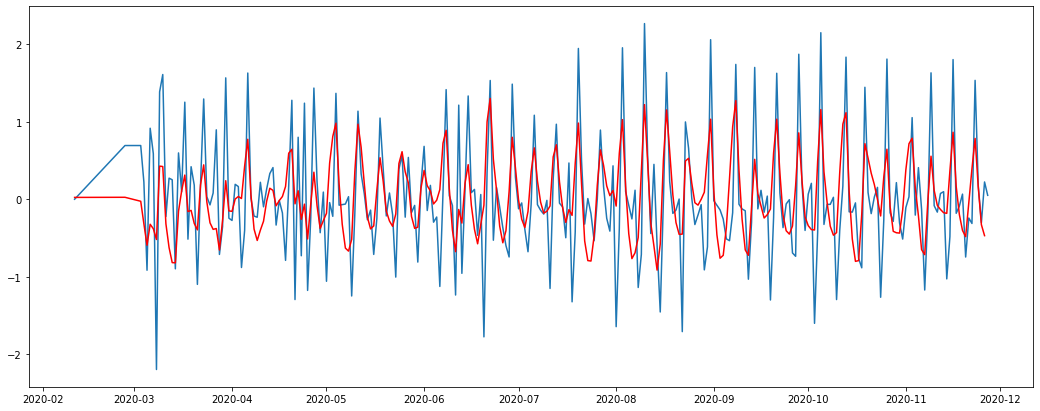

In [91]:
model2 = ARIMA(train, order=(2,1,2))
results2 = model2.fit(disp=-1)
plt.figure(figsize=(18,7))
plt.plot(train_shift)
plt.plot(results2.fittedvalues, color='red')

In [92]:
results2.aic

512.1623678604994

In [198]:
data = ts.values
size = int(len(data) * 0.7)
train, test = data[0:size], data[size:len(data)]
history = [x for x in train]
predictions = list()

In [206]:
# walk-forward validation
for t in range(len(test)):

	model = ARIMA(history, order=(10,1,2))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1640.188898, expected=1374.000000
predicted=1094.684146, expected=577.000000
predicted=1175.017089, expected=259.000000
predicted=935.203614, expected=1911.000000
predicted=707.774131, expected=1558.000000
predicted=804.777215, expected=1431.000000
predicted=1806.781200, expected=1299.000000
predicted=1591.941880, expected=1177.000000
predicted=457.098519, expected=391.000000
predicted=676.103698, expected=264.000000
predicted=1263.284324, expected=1429.000000
predicted=1720.176407, expected=1588.000000
predicted=1172.608138, expected=1329.000000
predicted=1325.361107, expected=1404.000000
predicted=1162.340781, expected=1176.000000
predicted=676.829779, expected=242.000000
predicted=397.451841, expected=261.000000
predicted=1182.505599, expected=989.000000
predicted=1432.659998, expected=1348.000000
predicted=1170.214287, expected=1168.000000
predicted=1255.988958, expected=1290.000000
predicted=1099.240015, expected=951.000000
predicted=439.582190, expected=387.000000
predi

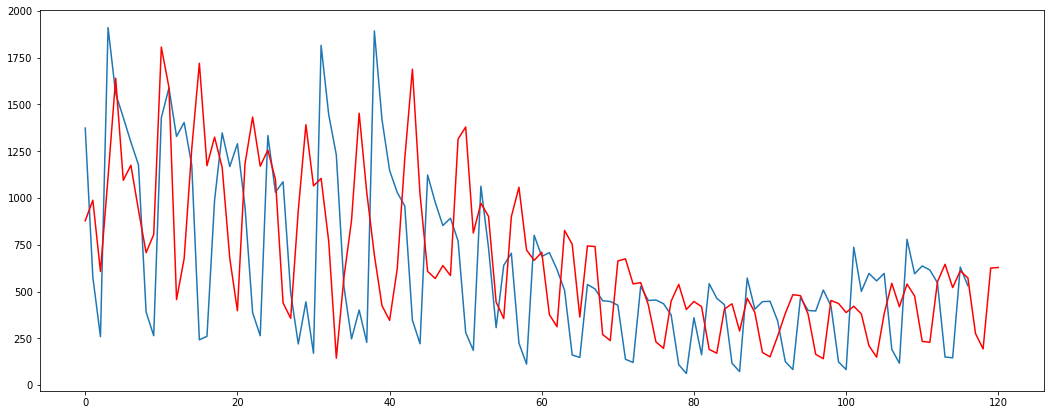

In [211]:
# plot forecasts against actual outcomes
plt.figure(figsize=(18,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [209]:
model_fit.aic

5423.369540592816